### New inserted code to read in the variables from the exported .csv file

In [1]:
file <- read.csv(paste(getwd(), "/metagenome_analysis_vars.csv", sep = ""),
                 colClasses = "character",
                 header = FALSE,
                 col.names = c("V1", "V2", "V3","V4"))

sample_column_id              <- file[1,2]
graph_output_dir              <- file[2,2]
stats_output_dir              <- file[3,2]
amr_count_matrix_filepath     <- file[4,2]
amr_metadata_filepath         <- file[5,2]
megares_annotation_filename   <- file[6,2]
biom_file                     <- file[7,2]
tre_file                      <- file[8,2]
tax_fasta                     <- file[9,2]
taxa_file                     <- file[10,2]
microbiome_temp_metadata_file <- file[11,2]

# Creates a list of all the AMR variables, and is dependent on the number inputed in the previous script
AMR_exploratory_analyses <- list()
for (i in 1:(which(file$V1 == "microbiome_exploratory_analyses") - 13)){
  subset_list = eval(parse(text=file[(12+i),2]))
  AMR_exploratory_analyses <- append(AMR_exploratory_analyses, 
                                     list(list(name = file[(12+i),1],
                                               subsets = subset_list,
                                               exploratory_var = file[(12+i),3],
                                               order = file[(12+i),4])))
}


y <- which(file$V1 == "microbiome_exploratory_analyses")
microbiome_exploratory_analyses <- list()
for (i in 1:(nrow(file) - y)){
  subset_list = eval(parse(text=file[(y+i),2]))
  microbiome_exploratory_analyses <- append(microbiome_exploratory_analyses, 
                                     list(list(name = file[(y+i),1],
                                               subsets = subset_list,
                                               exploratory_var = file[(y+i),3],
                                               order = file[(y+i),4])))
}

In [2]:
source('scripts/load_libraries.R')
source('scripts/meg_utility_functions.R')

# Bioinfomatic central script
insert introduction


## USER Controls

# I didn't get a good enough chance to write more notes for you, but here are some general guidelines:
* Try to find how we can add a GUI options for users to select files and otherwise fill out the objects that we need for the analyses. 
* We'll work on making it prettier and more organized so that users understand what we need from them and what are code is doing.
* Below is a little example of what I was writing to descrive the files we need.


First, we'll need to specify the location of important files on your machine. 
    
    You'll need to input files associated with the microbiome and resistome seperately. This allows for the option of including microbiome results from qiime2 or kraken2. 
    
        For the resistome:
            > Metadata file for all resistome samples (.csv)
            > Megares annotation file (.csv)
            > Count table results from the AMRplusplus pipeline (.csv)
        For the microbiome
            > Metadata file for all microbiome samples (.tsv)
            > etc..
        

# Next, we have to specify which variables you want to create exploratory graphs with

We should try to make this a click through option. And some users might not need both the AMR and microbiome analyses.

In [2]:
# The following is a list of analyses based on variables in 
# your metadata.csv file that you want
# to use for EXPLORATORY analysis (NMDS, PCA, alpha rarefaction, barplots)
# NOTE: Exploratory variables cannot be numeric. 

AMR_exploratory_analyses = list(
  # Analysis Store
  # Description: 
  list(
    name = 'Store',
    subsets = list(),
    exploratory_var = 'Blinded_Store',
    order = ''
  ),  
  # Analysis Dilution
  # Description: 
  list(
    name = 'Dilution',
    subsets = list(),
    exploratory_var = 'Dilution',
    order = ''
  ),  
  # Analysis ID
  # Description: 
  list(
    name = 'ID',
    subsets = list(),
    exploratory_var = 'ID',
    order = ''
  ),
  # Analysis 2
  # Description:
  list(
    name = 'Treatment',
    subsets = list(),
    exploratory_var = 'Treatment',
    order = ''
  ),
  # Analysis 3
  # Description:
  list(
    name = 'Packaging',
    subsets = list(),
    exploratory_var = 'Packaging',
    order = ''
  )
)



microbiome_exploratory_analyses = list(
  # Analysis Store
  # Description: 
  list(
    name = 'Store',
    subsets = list(),
    exploratory_var = 'Blinded_Store',
    order = ''
  ), 
  # Analysis ID
  # Description: 
  list(
    name = 'ID',
    subsets = list(),
    exploratory_var = 'ID',
    order = ''
  ),
  # Analysis 2
  # Description:
  list(
    name = 'Treatment',
    subsets = list(),
    exploratory_var = 'Treatment',
    order = ''
  ),
  # Analysis 3
  # Description:
  list(
    name = 'Packaging',
    subsets = list(),
    exploratory_var = 'Packaging',
    order = ''
  )
)



# This is for the ZIG model, don't worry to much about this for now

In [3]:

# Each analyses you wish to perform should have its own list in the following
# statistical_analyses list.  A template is provided to get you started.
# Multiple analyses, subsets, and contrasts are valid, but only one random
# effect can be used per analysis.  The contrasts of interest must have their
# parent variable in the model matrix equation.  Contrasts are named by
# parent variable then child variable without a space inbetween, for example:
# PVar1Cvar1 where the model matrix equation is ~ 0 + Pvar1.
AMR_statistical_analyses = list(
  # Analysis 1
  # Description: 
  list(
    name = 'Treatment',
    subsets = list(),
    model_matrix = '~ 0 + Treatment ',
    contrasts = list('TreatmentCONV - TreatmentRWA'),
    random_effect = NA
  )
)

microbiome_statistical_analyses = list(
  # Analysis 1
  # Description: 
  list(
    name = 'Treatment',
    subsets = list(),
    model_matrix = '~ 0 + Treatment ',
    contrasts = list('TreatmentCONV - TreatmentRWA'),
    random_effect = NA
  )
)


# This part is important for us to improve. STOP HERE
## Right now, we have to manually select which scripts to be run based on the analysis you need
* All of the objects above wil get used by the scripts we run below



Some things to work on:
* I'm getting a warning now due to some changes in other packages. It would be great if we could update the code to work with the new syntax
* Make drop down list where users can select which combination of analyses they need:
 * AMR/16S qiime2 results/kraken2 results
 

In [4]:
####### END OF USER CONTROLS ######

## Pick the correct script that handles resistome data and/or microbiome data.
#### If shotgun microbiome and megares analysis, run:
#source('scripts/metagenomeSeq_megares_kraken.R')

#### If 16S microbiome and megares analysis, run:
source('scripts/metagenomeSeq_megares_qiime.R')

[1] "No AMR features removed"
[1] "No microbiome features removed"


Default value being used.

Default value being used.

Default value being used.

Default value being used.



# Now, you can print exploratory figures to your local directory. 

This part takes a long time, but creates relative abundance barplots, diversity barplots, NMDS, PCA, and heatmaps. 
For now it's commented out because the NMDS function creates a bunch of messages that look ugly. We can probably find a way to fix this though. 

Other little things:
* I want to add better functionality to the functions in the "scripts/meg_utility_functions.R" file where we can better handle cases with factors > 20 in length

In [5]:
######## THEN print figures #

# After running this script, these are the useful objects that contain all the data aggregated to different levels
# The metagenomeSeq objects are contained in these lists "AMR_analytic_data" and "microbiome_analytic_data"
# Melted counts are contained in these data.table objects "amr_melted_analytic" "microbiome_melted_analytic"

## Run code to make some exploratory figures, zero inflated gaussian model, and output count matrices.
suppressMessages(source('scripts/print_figures.R'))

ERROR: Error in parse(text = conditional_string): <text>:1:20: unexpected numeric constant
1: local_meta[['NA']] NA
                       ^


# Everything after this is where we can get creative to summarize our results. For now, let's focus on streamlining how we use everything above
## Here, we can have an area to show them how to play around with ggplot2
    
### The main objects to use are
* AMR
  * amr_melted_analytic/amr_raw_melted_analytic
   * Object of all counts in long form
  * AMR_analytic_data
   * List of MRexperiment objects at each level; Class, Mechanism, Group, Gene
* Microbiome
  * microbiome_melted_analytic/microbiome_raw_melted_analytic
  * microbiome_analytic_data

    First, combine the normalized count tables with the metadata file.

In [8]:
head(amr_melted_analytic)

Level_ID,Name,ID,Normalized_Count
Class,betalactams,FC.199A1in2_concatenated,2967.2131
Class,Tetracyclines,FC.199A1in2_concatenated,15000.0000
Class,Multi-drug resistance,FC.199A1in2_concatenated,3377.0492
Class,Aminoglycosides,FC.199A1in2_concatenated,557.3770
Class,Bacitracin,FC.199A1in2_concatenated,0.0000
Class,MLS,FC.199A1in2_concatenated,131.1475


In [9]:
### Start of code for figures, combine table objects to include meta
setkey(amr_melted_raw_analytic,ID) 
setkey(amr_melted_analytic,ID) 

setkey(microbiome_melted_analytic,ID)
# Set keys for both metadata files
setkey(metadata,ID)
setkey(microbiome_metadata,ID)
microbiome_melted_analytic <- microbiome_melted_analytic[microbiome_metadata]
amr_melted_raw_analytic <- amr_melted_raw_analytic[metadata]
amr_melted_analytic <- amr_melted_analytic[metadata]

In [10]:
head(amr_melted_analytic)

Level_ID,Name,ID,Normalized_Count,rn,sample,City,Treatment,Dilution,Packaging,...,nonhost_filtered_reads,amrplusplus_counts,Samdedup_amrplusplus_counts,deduped_SNP_confirmed_counts,resistome_raw_mapped_reads,resistome_CSS_counts,AMR_class_Richness,AMR_class_Shannon,AMR_mech_Richness,AMR_mech_Shannon
Class,betalactams,FC.112A1in2_concatenated,1427.0833,FC.112A1in2_concatenated,FC_112,Fort Collins,RWA,Half,Vacuum,...,5538,82,60,673,668,6958.333,10,1.701165,18,2.167576
Class,Tetracyclines,FC.112A1in2_concatenated,2750.0000,FC.112A1in2_concatenated,FC_112,Fort Collins,RWA,Half,Vacuum,...,5538,82,60,673,668,6958.333,10,1.701165,18,2.167576
Class,Multi-drug resistance,FC.112A1in2_concatenated,520.8333,FC.112A1in2_concatenated,FC_112,Fort Collins,RWA,Half,Vacuum,...,5538,82,60,673,668,6958.333,10,1.701165,18,2.167576
Class,Aminoglycosides,FC.112A1in2_concatenated,1187.5000,FC.112A1in2_concatenated,FC_112,Fort Collins,RWA,Half,Vacuum,...,5538,82,60,673,668,6958.333,10,1.701165,18,2.167576
Class,Bacitracin,FC.112A1in2_concatenated,62.5000,FC.112A1in2_concatenated,FC_112,Fort Collins,RWA,Half,Vacuum,...,5538,82,60,673,668,6958.333,10,1.701165,18,2.167576
Class,MLS,FC.112A1in2_concatenated,239.5833,FC.112A1in2_concatenated,FC_112,Fort Collins,RWA,Half,Vacuum,...,5538,82,60,673,668,6958.333,10,1.701165,18,2.167576


# Create plots below

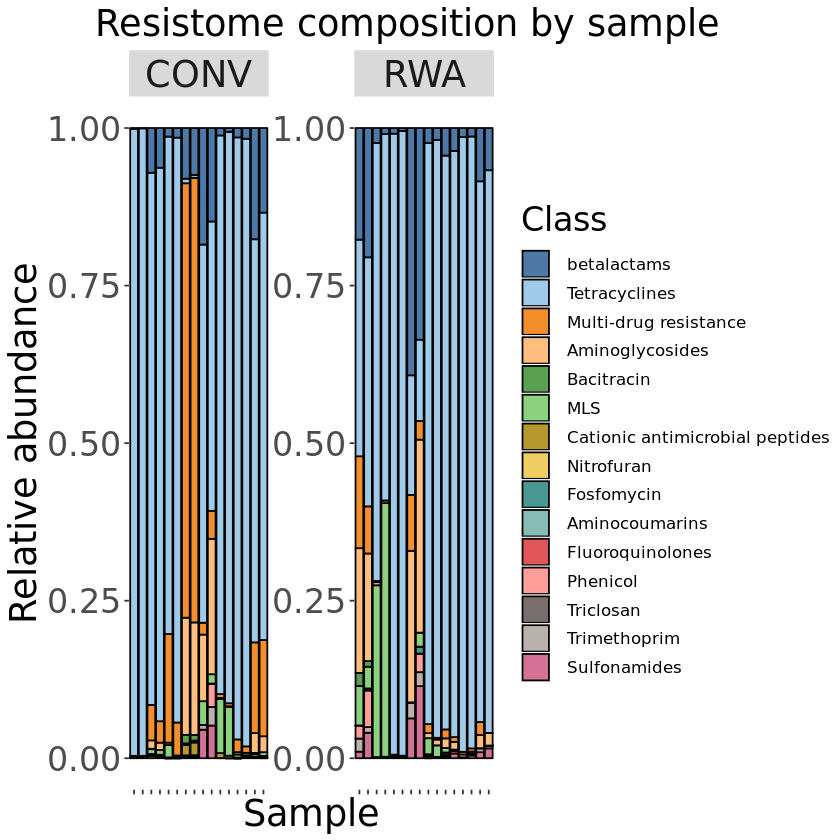

In [11]:
## Figure 1 showing resistome composition
AMR_class_sum <- amr_melted_analytic[Level_ID=="Class", .(sum_class= sum(Normalized_Count)),by=.(ID, Name, Packaging, Treatment)][order(-Packaging )]
AMR_class_sum[,total:= sum(sum_class), by=.(ID)]
AMR_class_sum[,percentage:= sum_class/total ,by=.(ID, Name) ]
AMR_class_sum$Class <- AMR_class_sum$Name
fig1 <- ggplot(AMR_class_sum, aes(x = ID, y = percentage, fill = Class)) + 
  geom_bar(stat = "identity",colour = "black")+
  facet_wrap( ~ Treatment, scales='free',ncol = 2) +
  #scale_fill_brewer(palette="Dark2") +
  theme(
    panel.grid.major=element_blank(),
    panel.grid.minor=element_blank(),
    strip.text.x=element_text(size=22),
    strip.text.y=element_text(size=22, angle=0),
    axis.text.x=element_blank(), #element_text(size=16, angle=20, hjust=1)
    axis.text.y=element_text(size=20),
    axis.title=element_text(size=22),
    legend.position="right",
    panel.spacing=unit(0.1, "lines"),
    plot.title=element_text(size=22, hjust=0.5),
    legend.text=element_text(size=10),
    legend.title=element_text(size=20),
    panel.background = element_rect(fill = "white")
  ) +
  ggtitle("\t\tResistome composition by sample") +
  xlab('Sample') +
  ylab('Relative abundance') +
  scale_fill_tableau("Tableau 20") 
fig1